### Import libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

### Import data

In [2]:
data = pd.read_csv('german.data', sep=' ', names=['Status', 'Duration (months)', 'Credit history', 'Purpose', 'Credit Amount', 'Savings Account', 'Present Emplyment Length', 'Installment Rate', 'Personal Status: Sex', 'Other Guarntors', 'Present Residence Length', 'Property', 'Age', 'Other Installment Plans', 'Housing Type', 'Number of Existing Credits', 'Job Type', 'Number of People Maintenance', 'Telephone', 'Foreign Worker', 'Customer Class'])

### Inspect Data

In [3]:
data.describe()

,Duration (months),Credit Amount,Installment Rate,Present Residence Length,Age,Number of Existing Credits,Number of People Maintenance,Customer Class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


### OneHotEncode categorical column if needed

In [4]:
def encode_cat_columns(data, col_name):
    labelencoder = LabelEncoder()
    data[col_name] = labelencoder.fit_transform(data[col_name])
    onehotencoder = OneHotEncoder()
    arroneHot = onehotencoder.fit_transform(data[col_name].values.reshape(-1,1)).toarray()
    dfOneHot = pd.DataFrame(arroneHot, columns = [col_name+"_"+str(int(i)) for i in range(arroneHot.shape[1])])
    data = data.drop(col_name, axis=1)
    data = pd.concat([data, dfOneHot], axis=1)
    return data

In [5]:
features = ['Status', 'Credit history', 'Purpose','Savings Account', 'Present Emplyment Length',
'Installment Rate', 'Personal Status: Sex', 'Other Guarntors', 'Property',
'Other Installment Plans', 'Housing Type', 'Job Type', 'Telephone', 'Foreign Worker']
for feature in features:
    data = encode_cat_columns(data, feature)

C:\Users\manis\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\manis\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

### Seperate data into X and y (result column)

In [6]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

### Split data into train (70%) and test (30%)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Try a simple model to serve as base accurracy value. The model is improved in the further steps.

In [8]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#acc = accuracy_score(y_test, y_pred)
#print('Accurracy: {:.4%}'.format(acc))
confusion_matrix(y_test, y_pred)

array([[289,   0],
       [  0,  11]], dtype=int64)

## Advanced modeling

### Heatmap Analysis: Drop columns with low correlation to output column

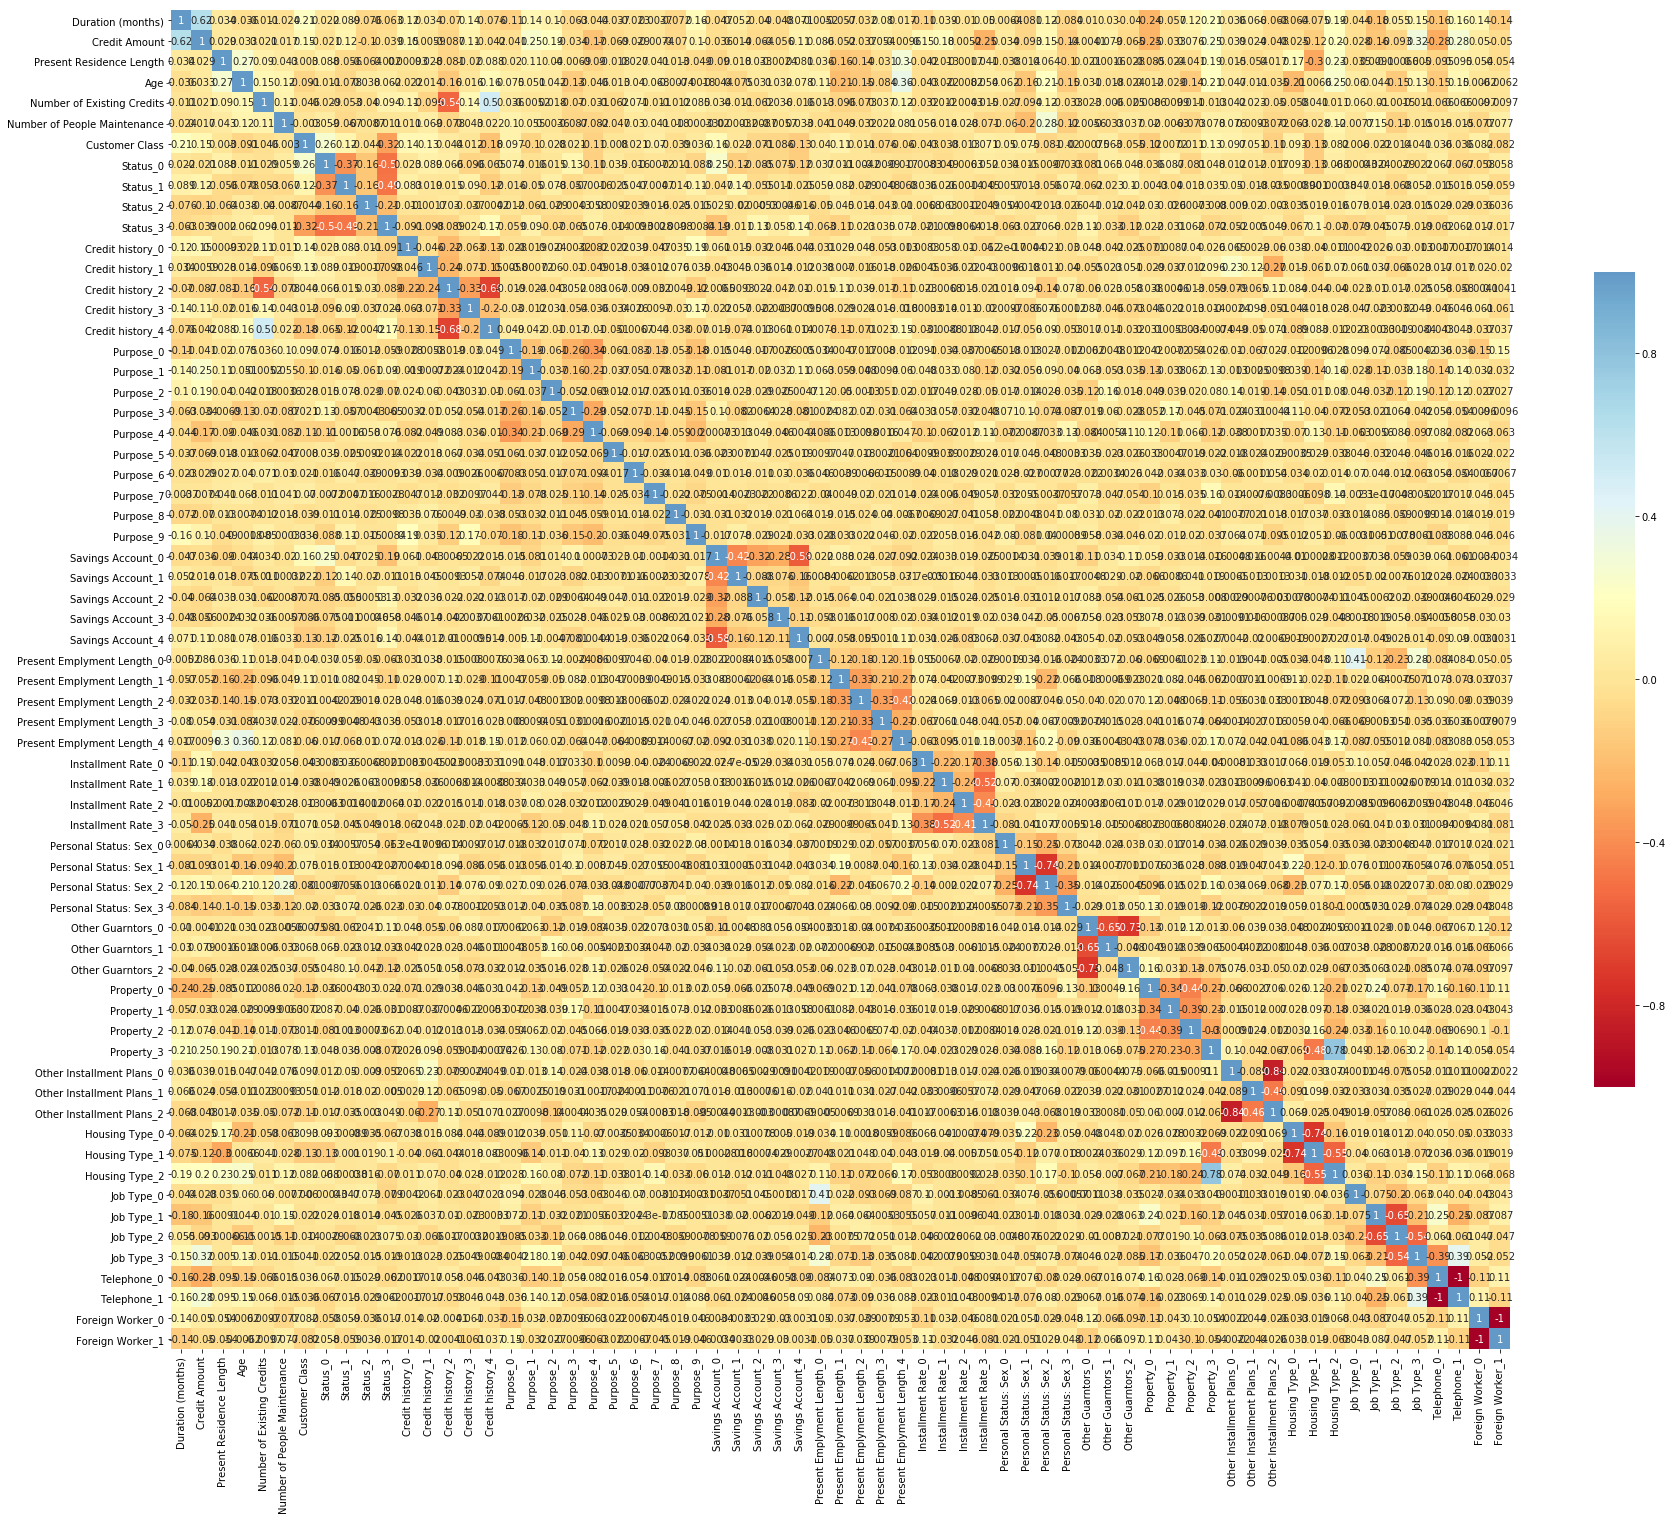

In [9]:
corr = data.corr()
plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr, center=0.2, cmap="RdYlBu", square=True, linewidths=0, cbar_kws={"shrink": .5}, annot = True);

## Visualization

ValueError: Could not interpret input 'Credit history'

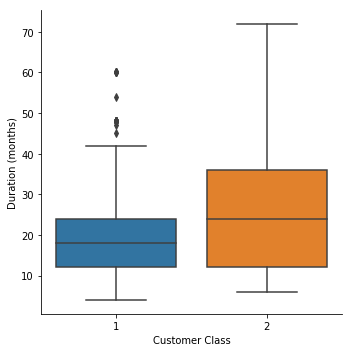

In [11]:
#sns.catplot(x="Status", kind="count", hue="Customer Class", data=data);
sns.catplot(x="Customer Class", y="Duration (months)", kind="box", data=data);
sns.catplot(x="Credit history", kind="count", hue="Customer Class", data=data);
sns.catplot(x="Purpose", kind="count", hue="Customer Class", data=data);
sns.catplot(x="Customer Class", y="Age", kind="box", data=data);